In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [24]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\advertising.csv")
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [25]:
df.shape

(200, 4)

In [26]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


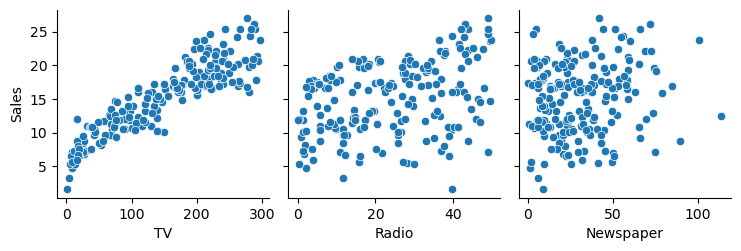

In [27]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

# when advertising cost increases in TV we observe that there is a increase of sales 

<Axes: >

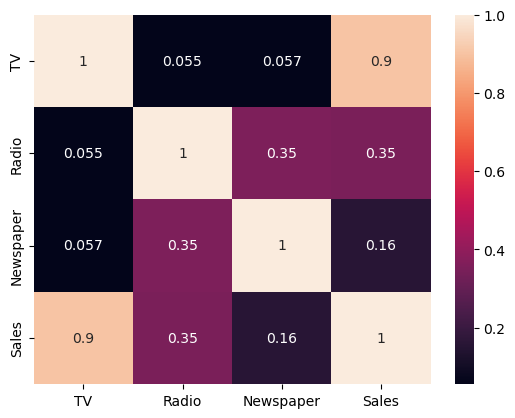

In [28]:
sns.heatmap(df.corr(),annot=True)
#use of annot is to value of each cell 

In [13]:
#we see from the above shading matrix that the value of the TV and its sales is the highest when there is the use of advertising

# Training the model


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['TV','Radio','Newspaper']],df[['Sales']],test_size=0.2,random_state=0)

In [40]:
print(X_train)

        TV  Radio  Newspaper
134   36.9   38.6       65.6
66    31.5   24.6        2.2
26   142.9   29.3       12.6
113  209.6   20.6       10.7
168  215.4   23.6       57.6
..     ...    ...        ...
67   139.3   14.5       10.2
192   17.2    4.1       31.6
117   76.4    0.8       14.8
47   239.9   41.5       18.5
172   19.6   20.1       17.0

[160 rows x 3 columns]


In [41]:
print(Y_train)

     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]


In [42]:
X_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [43]:
Y_test

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7
182,8.7
5,7.2
146,18.2
12,9.2
152,16.6


In [44]:
Y_test.shape

(40, 1)

In [45]:
X_test.shape

(40, 3)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
preprocessing1=Pipeline([('scaler',StandardScaler())])
log=Pipeline([('Preprocess',preprocessing1),('Regressor',RandomForestRegressor())
             ])
log.fit(X_train,Y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('Preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('Regressor', RandomForestRegressor())])

In [50]:
from sklearn.metrics import r2_score
res=log.predict(X_test)
print(f'testing Accuracy :{round(100*r2_score(Y_test,res),2)}%')

testing Accuracy :94.64%


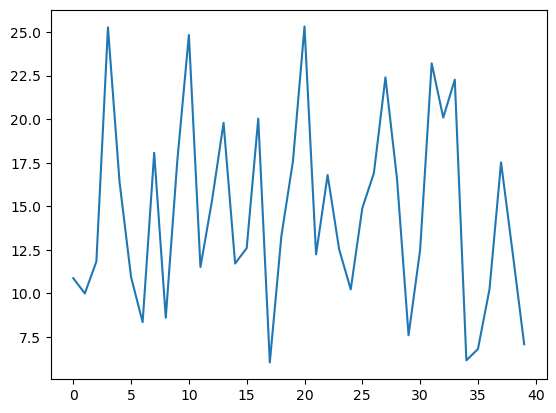

In [51]:
plt.plot(res)